# HOS 

In [1]:
import _Library_HOS
from Classe_sismogramma_v3 import ClasseDataset
import pandas as pd

# ATTENTO prima di usate get_onset, 1) Fallo su quelle a 200 HZ
                                #   2) PRIMA devi fare filtro passa alto (sui 3-5 Hz)
# parametri di metodo HOS DA OTTIMIZZARE "SUL POLLINO" (però siamo a 100 HZ!!!! poi fai anche test su quelle già picked di DETECT?)
# Scrivi il codice che usi in un unico file e condividi!

hd = "/home/silvia/Desktop/Data/Pollino_All/Pollino_All_data_extended.hdf5"
cs = "/home/silvia/Desktop/Data/Pollino_All/Pollino_All_metadata_extended.csv"

D = ClasseDataset()
D.leggi_custom_dataset(hd,cs)
D.demean()

# sig = _Library_HOS.freq_filter(D.sismogramma[7], 200, 5, type_filter= "highpass")
# onset_1, diff, onset_2 = _Library_HOS.get_onset(sig, 40, threshold=0.1, statistics= _Library_HOS.S_6)
# print(onset_1, onset_2)


In [123]:
uu = pd.DataFrame.from_dict(D.metadata["trace_name"])
uu["trace_P_arrival_sample"] = D.metadata["trace_P_arrival_sample"]

In [127]:
string = f"filter freq : {freq_filter} window_width: {window_width} tresh: {tresh}"

In [133]:
uu.to_csv("/home/silvia/Desktop/ONSET_POLLINO.csv",index=False)

In [134]:
uu

,trace_name,trace_P_arrival_sample,filter freq : 1 window_width: 100 tresh: 0.25,filter freq : 1 window_width: 100 tresh: 0.25_ons_th
0,20100130012400_M2.5.CRAC,2470,"[2, 2]",2469
1,20100130012400_M2.5.CUC,2183,"[2, 2]",328
2,20100130012400_M2.5.MGR,2537,"[2, 2]",2538
3,20100130012400_M2.5.ORI,2046,"[2, 2]",2047
4,20100130012400_M2.5.SALB,1935,"[2, 2]",1935
...,...,...,...,...
6344,20141125134311_M1.9.MTSN,1988,"[2, 2]",1991
6345,20141125134311_M1.9.SCHR,1891,"[2, 2]",1892
6346,20141125134311_M1.9.SIRI,1820,"[2, 2]",1821
6347,20141125134311_M1.9.T0722,2116,"[2, 2]",2118


In [91]:
import _Library_HOS
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 100
typ_filter = "highpass"

freq_filter = 1
window_width = 100
tresh = 0.25

stat = _Library_HOS.S_6


for freq_filter in [1,2,3,5,10]:
    for window_width in [40,50,80,100,150,200]:
        for tresh in [0.1,0.2,0.25,0.3,0.4]:
            ons_th = []
            ons_max = []
            for i in range(len(D.sismogramma)):
                sig = _Library_HOS.freq_filter(D.sismogramma[i], D.metadata["sampling_rate"][i], freq_filter, type_filter= typ_filter)
                onset_th, diff, onset_max,u  = _Library_HOS.get_onset_2(sig, window_width, threshold=tresh, statistics= stat)
                ons_th.append(onset_th)
                ons_max.append(onset_max)
                #onset_1, diff, onset_2  = _Library_HOS.get_onset(sig, window_width, threshold=tresh, statistics= stat)
                # print(onset_1, onset_2)
            ons_th = np.array(ons_th)
            ons_max = np.array(ons_max)

(array([  70.,  887., 4413.,  169.,  781.]),
 array([-10000,    -50,     -5,      5,     50,   4000]),
 <BarContainer object of 5 artists>)

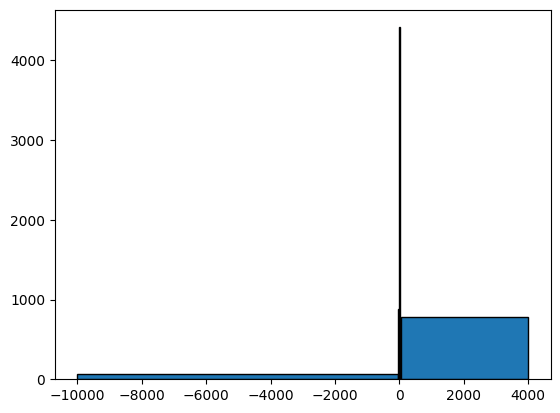

In [113]:
plt.hist(D.metadata["trace_P_arrival_sample"].values-ons_th,bins=[-10000,-50,-5,5,50,4000],edgecolor="black")

In [110]:
np.std(D.metadata["trace_P_arrival_sample"].values-ons_max)

1542.0301952201726

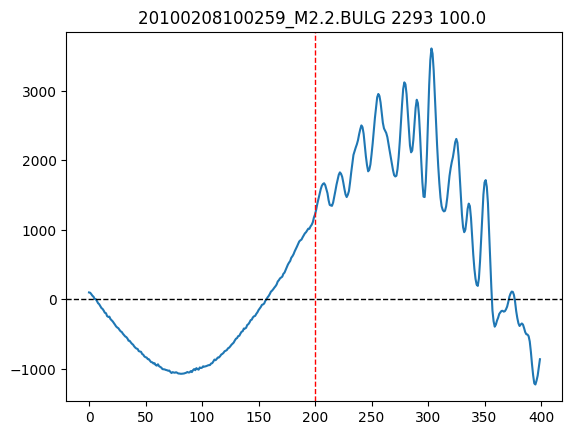

In [88]:
D.plotta([7],semiampiezza=200)

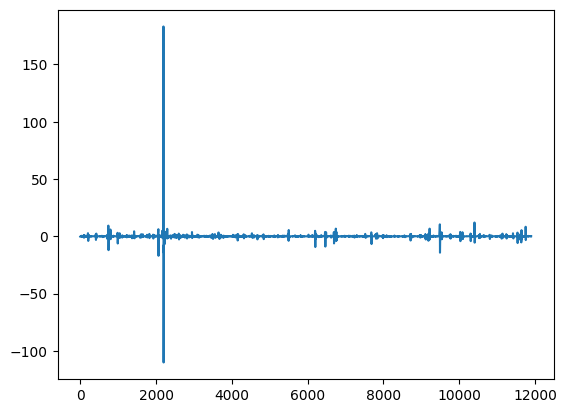

In [83]:
import matplotlib.pyplot as plt
plt.plot(diff)

In [78]:
D.metadata["trace_P_arrival_sample"][7]

2293

In [118]:
D.metadata["sampling_rate"]

0       100.000000
1       100.000000
2       100.000000
3       100.000000
4       100.000000
           ...    
6344    100.000000
6345    100.000000
6346    100.000000
6347    124.999992
6348    124.999992
Name: sampling_rate, Length: 6349, dtype: float64

# TEST

Mi sa che devo cambiare il programma... da get_hos per fargli fare le cose in parallelo. per ora fa una traccia alla volta..